In [1]:
# Shelterluv Adoption & Length of Stay Analysis
# ---------------------------------------------
# Basic setup: load libraries and configure visuals

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Make plots look nice
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Show all columns in pandas output
pd.set_option("display.max_columns", None)

In [2]:
# Load Data

## Load demographic data
df_demo = pd.read_csv("../data/SL_data_20251112.csv")

## Load length-of-stay/outcome data
df_los = pd.read_csv("../data/SL_length_of_stay_20251112.csv")

## Merge datasets on 'Animal ID'
df = pd.merge(df_demo, df_los, on='Animal ID', how='inner')

## Quick peak at data to get column names
df.head()

,Date Created,Intake Date_x,Animal ID,Name,Primary Breed_x,Secondary Breed_x,Sex,Age (Y/M/D),Age Group,Birthdate,Primary Color,Secondary Color,Pattern,Microchip Number,Microchip Issuer,Microchip Implant Date,Adoption Category,Current Location_x,Days In Custody,Current Status_x,Holdable,Adoptable,In Custody,Adoption Fee Group,Foster Person ID,Foster Person Name,Photo,Foster Notes,Animal Name,Species,Primary Breed_y,Secondary Breed_y,Date of Birth,Age Group at Intake,Current Status_y,Current Location_y,Intake Date_y,Intake Type,Outcome Date,Outcome Type,Days in Custody,Days Onsite,Days Available
0,06/20/2024,04/18/2024,CCL-A-1,Alice,Domestic Shorthair,—,Female,11Y/6M/26D,Senior Cat,4/16/2014,Torbie,NaN,NaN,NaN,—,—,—,Euthanased,88,Deceased,No,No,No,—,—,—,https://new-s3.shelterluv.com/profile-pictures...,—,Alice,Cat,Domestic Shorthair,NaN,4/16/2014,Senior Cat (8+ years),Deceased,Euthanased,4/18/2024,Stray In,7/14/2024,Euthanasia,88,88,88
1,06/26/2024,03/18/2024,CCL-A-2,Asher,Domestic Shorthair,—,Male,2Y/8M/0D,Adult Cat,3/12/2023,Black,NaN,NaN,992000003360734,NanoCHIP,—,Restrictions,Adopted: Sandra Decker,212,Healthy In Home,No,No,No,Bonded Pair,—,—,https://new-s3.shelterluv.com/profile-pictures...,—,Asher,Cat,Domestic Shorthair,NaN,3/12/2023,Adult Cat (5 months-8 years),Healthy In Home,Adopted: Sandra Decker,3/18/2024,Stray In,10/15/2024,Adoption,212,212,212
2,06/26/2024,06/03/2024,CCL-A-4,Criminal,Domestic Shorthair,—,Male,2Y/11M/27D,Adult Cat,11/15/2022,Orange,NaN,NaN,992000003226634,Other,—,—,Adopted: Shyanne Baker,108,Healthy In Home,No,No,No,Adult Cat,—,—,https://new-s3.shelterluv.com/profile-pictures...,—,Criminal,Cat,Domestic Shorthair,NaN,11/15/2022,Adult Cat (5 months-8 years),Healthy In Home,Adopted: Shyanne Baker,6/3/2024,Stray In,9/18/2024,Adoption,108,108,108
3,06/26/2024,04/04/2024,CCL-A-5,Cedar,Domestic Shorthair,—,Female,2Y/5M/8D,Adult Cat,6/4/2023,Brown,NaN,Tabby,992000003226633,NanoCHIP,—,Medical Special Adoption,Adopted: Linay Verge,185,Healthy In Home,No,No,No,FIV+,—,—,https://new-s3.shelterluv.com/profile-pictures...,—,Cedar,Cat,Domestic Shorthair,NaN,6/4/2023,Adult Cat (5 months-8 years),Healthy In Home,Adopted: Linay Verge,4/4/2024,Stray In,10/5/2024,Adoption,185,185,185
4,06/26/2024,06/10/2024,CCL-A-6,Brittle (Max),Domestic Shorthair,—,Female,3Y/7M/10D,Adult Cat,4/2/2022,Calico,NaN,NaN,99200003226732,Other,—,—,Adopted: Jakyrah Harris,101,Healthy In Home,No,No,No,Adult Cat,—,—,https://new-s3.shelterluv.com/profile-pictures...,—,Brittle (Max),Cat,Domestic Shorthair,NaN,4/2/2022,Adult Cat (5 months-8 years),Healthy In Home,Adopted: Jakyrah Harris,6/10/2024,Stray In,9/18/2024,Adoption,101,101,101


In [8]:
# Clean and Prepare Data

## Check column types, is possibly a string at this point
print(df[['Intake Date_x','Outcome Date']].dtypes)
      
## Convert date columns to datetime
df['Intake Date'] = pd.to_datetime(df['Intake Date_x'], errors='coerce')
df['Outcome Date'] = pd.to_datetime(df['Outcome Date'], errors='coerce')

## Check column types, should be a datetime
print(df[['Intake Date','Outcome Date']].dtypes)

## Calculate Length of Stay
df['Length of Stay (days)'] = (df['Outcome Date'] - df['Intake Date']).dt.days

## Remove rows with missing critical data
df = df.dropna(subset=['Intake Date', 'Outcome Date', 'Length of Stay (days)'])

## Remove negative LOS
df = df[df['Length of Stay (days)'] >= 0]

## Take a peak
df[['Animal ID', 'Intake Date', 'Outcome Date', 'Primary Breed_x', 'Sex', 'Age Group', 'Primary Color', 'Adoption Fee Group', 'Outcome Type']].head()


Intake Date_x            object
Outcome Date     datetime64[ns]
dtype: object
Intake Date     datetime64[ns]
Outcome Date    datetime64[ns]
dtype: object


,Animal ID,Intake Date,Outcome Date,Primary Breed_x,Sex,Age Group,Primary Color,Adoption Fee Group,Outcome Type
0,CCL-A-1,2024-04-18,2024-07-14,Domestic Shorthair,Female,Senior Cat,Torbie,—,Euthanasia
1,CCL-A-2,2024-03-18,2024-10-15,Domestic Shorthair,Male,Adult Cat,Black,Bonded Pair,Adoption
2,CCL-A-4,2024-06-03,2024-09-18,Domestic Shorthair,Male,Adult Cat,Orange,Adult Cat,Adoption
3,CCL-A-5,2024-04-04,2024-10-05,Domestic Shorthair,Female,Adult Cat,Brown,FIV+,Adoption
4,CCL-A-6,2024-06-10,2024-09-18,Domestic Shorthair,Female,Adult Cat,Calico,Adult Cat,Adoption


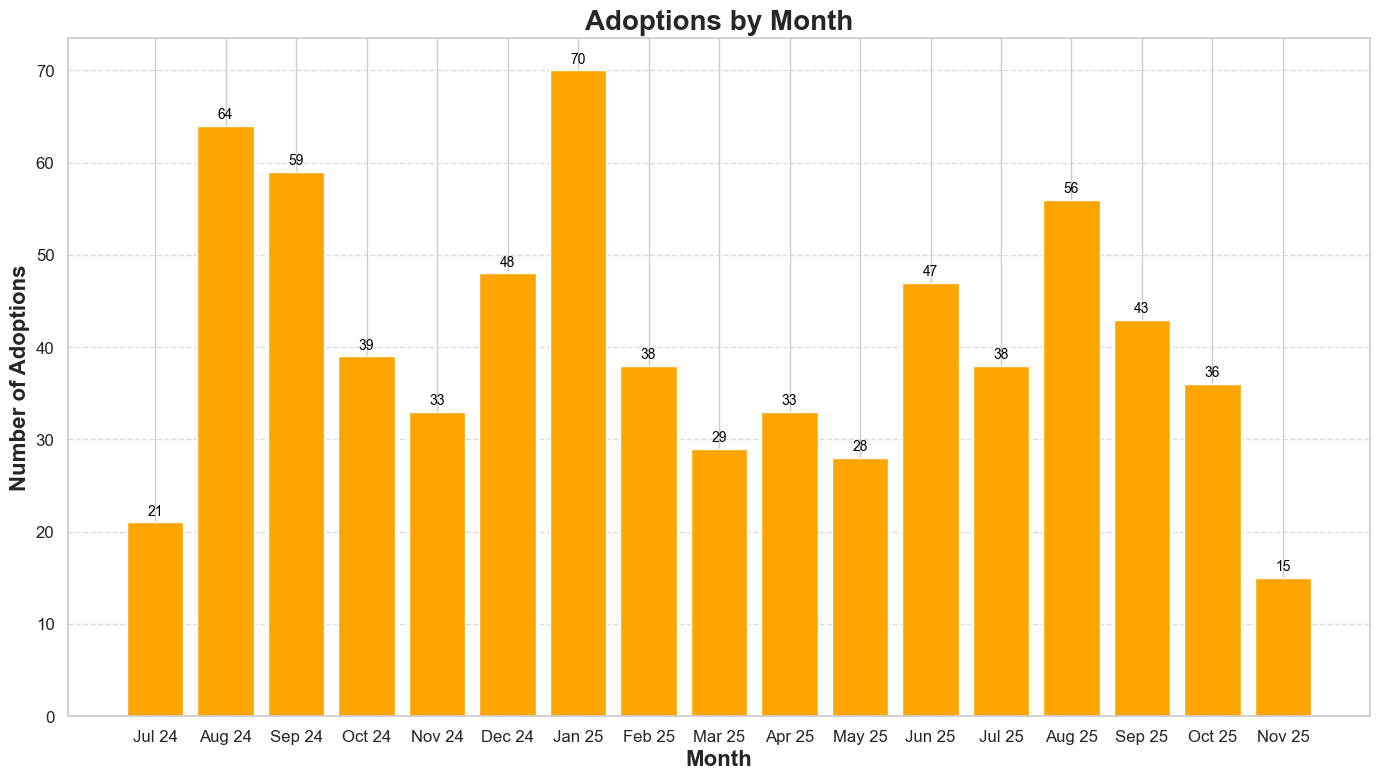

In [16]:
# Adoptions Over Time Analysis
## Filter to adoption outcomes
adoptions = df[df['Outcome Type'].str.lower().str.contains('adoption', na=False)]

## Group by month
adoptions_over_time = (
    adoptions.groupby(adoptions['Outcome Date'].dt.to_period('M'))
    .size()
    .rename("Adoptions")
    .reset_index()
)

# Convert 'Outcome Date' from Period to datetime, then format as MM/YY
adoptions_over_time['Outcome Date'] = (
    adoptions_over_time['Outcome Date']
    .dt.to_timestamp()
    .dt.strftime('%b %y')
)

fig, ax = plt.subplots(figsize=(14, 8))
ax.bar(adoptions_over_time['Outcome Date'], adoptions_over_time['Adoptions'], color='orange')
ax.set_title("Adoptions by Month", fontsize=20, fontweight='bold')
ax.set_xlabel("Month", fontsize=16, fontweight='bold')
ax.set_ylabel("Number of Adoptions", fontsize=16, fontweight='bold')

# Add bar labels
ax.bar_label(ax.containers[0], padding=3, color='black', fontsize=10)
ax.grid(axis="y", linestyle="--", alpha=0.7)

# plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

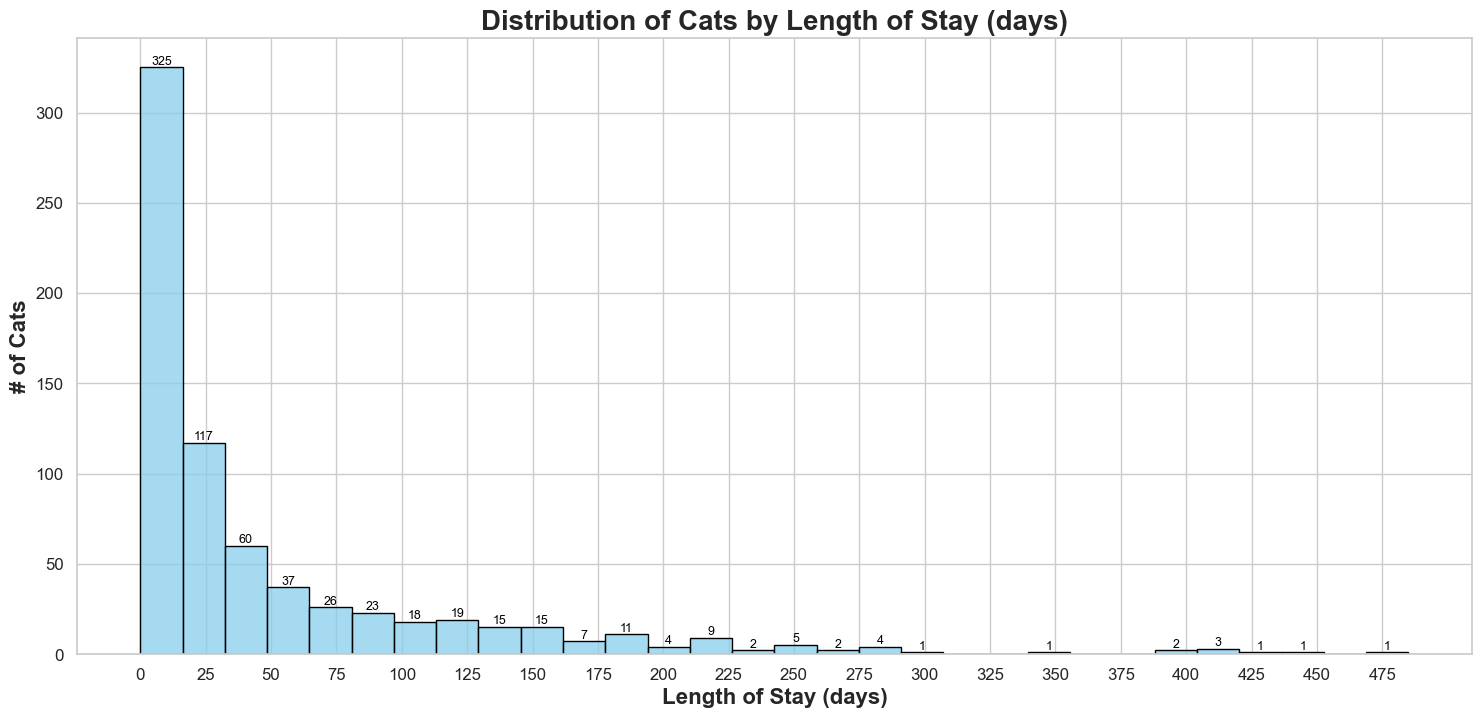

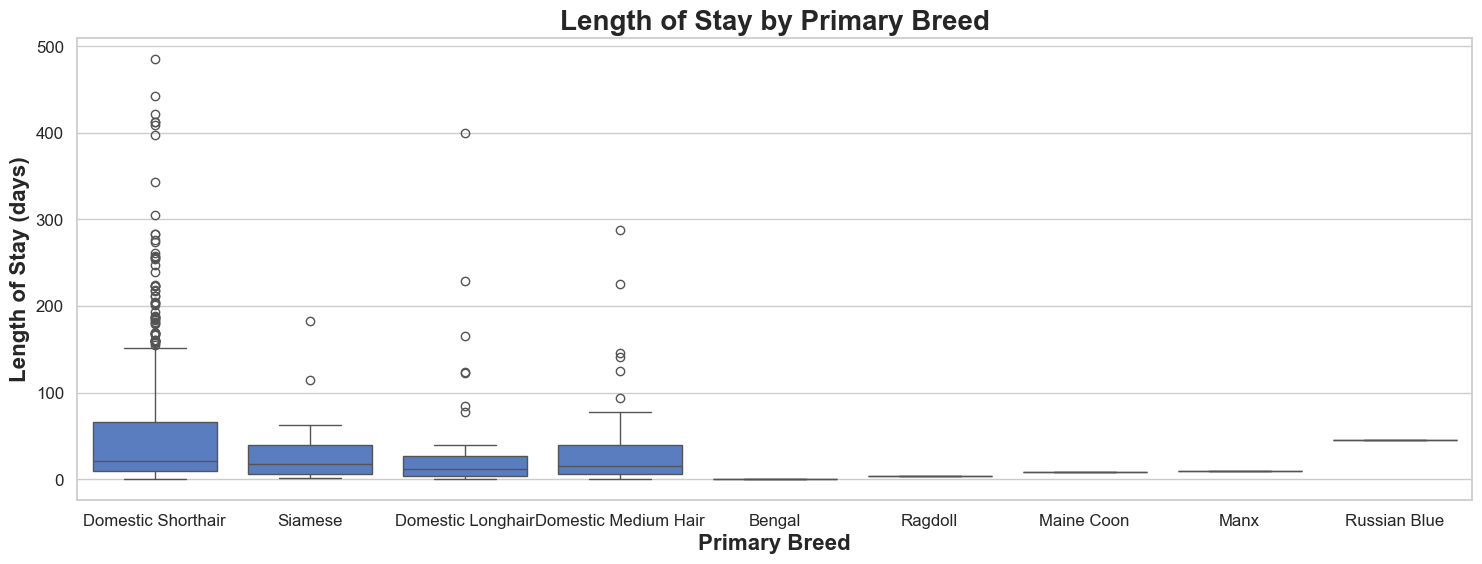

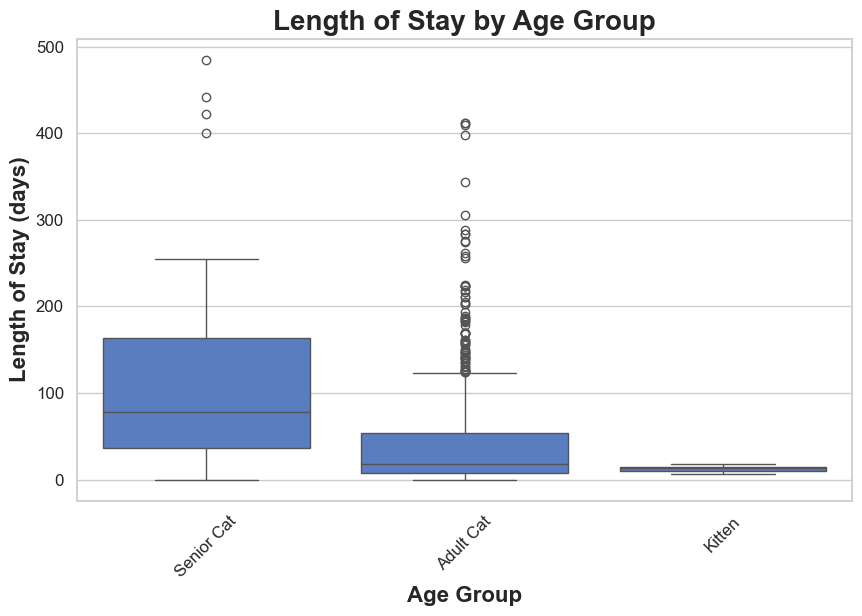

In [25]:
# Length of Stay Analysis
## Histogram of Length of Stay
plt.figure(figsize=(18,8))
ax = sns.histplot(df['Length of Stay (days)'], bins=30, kde=False, color='skyblue', edgecolor='black')

# Add labels above bars
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(
            patch.get_x() + patch.get_width()/2,  # center of the bar
            height,
            int(height),                          # label
            ha='center',
            va='bottom',
            fontsize=9,
            color='black'
        )

# Set x-axis ticks
max_days = int(df['Length of Stay (days)'].max())
ticks = np.arange(0, max_days + 1, 25)
ax.set_xticks(ticks)

plt.title("Distribution of Cats by Length of Stay (days)", fontsize=20, fontweight='bold')
plt.xlabel("Length of Stay (days)", fontsize=16, fontweight='bold')
plt.ylabel("# of Cats", fontsize=16, fontweight='bold')
plt.show()

## Boxplot by Primary Breed
if 'Primary Breed_x' in df.columns:
    plt.figure(figsize=(18,6))
    sns.boxplot(data=df, x='Primary Breed_x', y='Length of Stay (days)')
    plt.title("Length of Stay by Primary Breed", fontsize=20, fontweight='bold')
    plt.xlabel("Primary Breed", fontsize=16, fontweight='bold')
    plt.ylabel("Length of Stay (days)", fontsize=16, fontweight='bold')
    plt.show()

## Boxplot by Age Group
if 'Age Group' in df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x='Age Group', y='Length of Stay (days)')
    plt.title("Length of Stay by Age Group", fontsize=20, fontweight='bold')
    plt.xlabel("Age Group", fontsize=16, fontweight='bold')
    plt.ylabel("Length of Stay (days)", fontsize=16, fontweight='bold')
    plt.xticks(rotation=45)
    plt.show()

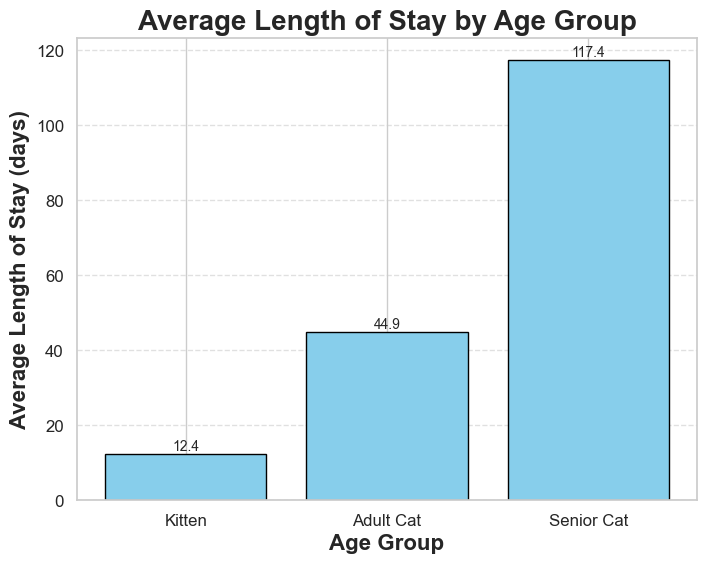

In [39]:
# Average Length of Stay (days) by Age Group

## Calculate average Length of Stay by Age Group
avg_los = df.groupby('Age Group')['Length of Stay (days)'].mean().reset_index()

## Define a logical age order
age_order = ['Kitten', 'Adult Cat', 'Senior Cat']
avg_los['Age Group'] = pd.Categorical(avg_los['Age Group'], categories=age_order, ordered=True)
avg_los = avg_los.sort_values('Age Group')

## Create bar chart
plt.figure(figsize=(8,6))
bars = plt.bar(avg_los['Age Group'], avg_los['Length of Stay (days)'], color='skyblue', edgecolor='black')

## Add numeric labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, f"{height:.1f}",
             ha='center', va='bottom', fontsize=10)

# Step 4: Titles and labels
plt.title("Average Length of Stay by Age Group", fontsize=20, fontweight='bold')
plt.xlabel("Age Group", fontsize=16, fontweight='bold')
plt.ylabel("Average Length of Stay (days)", fontsize=16, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Mean Absolute Error (MAE): 49.68 days
R^2 Score: 0.11


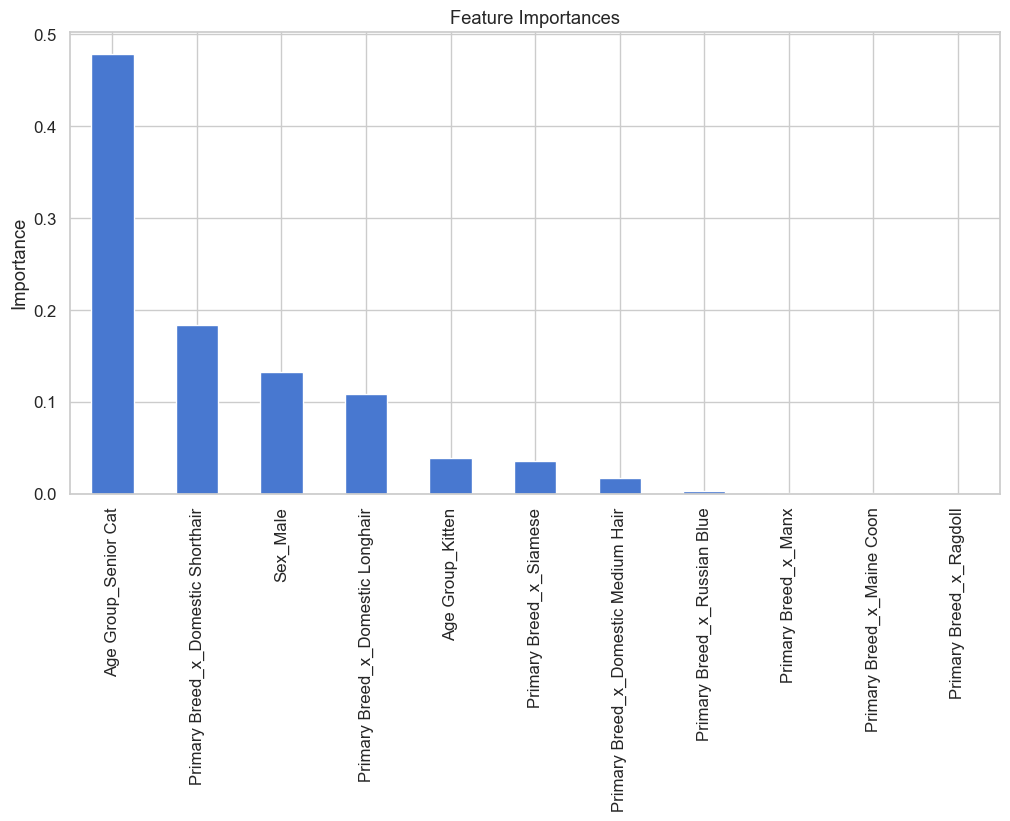

In [41]:
# Predictive Model for Length of Stay

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

## Features for prediction
features = ['Age Group', 'Sex', 'Primary Breed_x',]
df_model = df[features + ['Length of Stay (days)']].dropna()

## One-hot encode categorical variables
df_model = pd.get_dummies(df_model, drop_first=True)

## Split features and target
X = df_model.drop('Length of Stay (days)', axis=1)
y = df_model['Length of Stay (days)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

## Make predictions
y_pred = model.predict(X_test)

## Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f} days")
print(f"R^2 Score: {r2:.2f}")

## Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.plot(kind='bar', figsize=(12,6), title="Feature Importances")
plt.ylabel("Importance")
plt.show()
